In [2]:
import itertools

from PolishSystem.read_data import get_pRef_from_vectors, get_vectors_file_name, get_fitness_file_name
from PolishSystem.DataCollection.ResultsRepresentation.BenchmarkDataGeneratorInterface import DataSet

data_folder = r"C:\Users\gac8\PycharmProjects\PSSearch\data\retail_forecasting"
vector_size = 250
clustering_method = "random"
fitness_column = 2

vectors_file_name = get_vectors_file_name(data_folder, vector_size=250, clustering_method="random")
fitness_file_name = get_fitness_file_name(data_folder, vector_size, clustering_method)
pRef = get_pRef_from_vectors(name_of_vectors_file=vectors_file_name, name_of_fitness_file=fitness_file_name, column_in_fitness_file=2)


pRef

PRef with 52639 samples, mean = 7.64

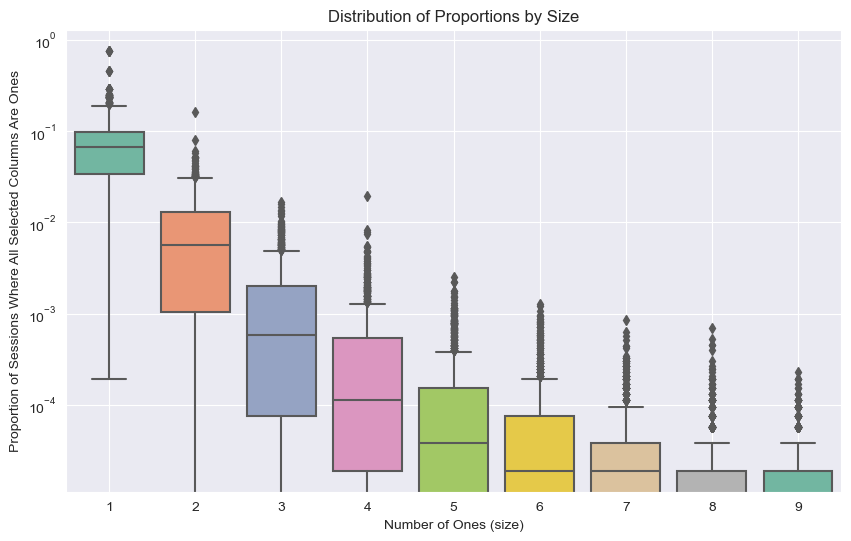

In [11]:


import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def make_plot_for_pRef(pRef):
    n = pRef.search_space.amount_of_parameters
    possible_indices = list(range(n))
    matrix = pRef.full_solution_matrix
    
    def count_sessions_where_cols_are_ones(col_count: int):
        cols = random.sample(possible_indices, k=col_count)
        return np.sum(np.product(matrix[:, cols], axis=1))
    
    samples_per_size = 1000
    sizes = np.array([size for sample in range(samples_per_size) for size in range(1, 10)])
    proportions = np.array([count_sessions_where_cols_are_ones(size)/pRef.sample_size for size in sizes])
    
    df = pd.DataFrame({"size":sizes, "proportion": proportions})
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="size", y="proportion", palette="Set2")
    plt.title("Distribution of Proportions by Size")
    plt.xlabel("Number of Ones (size)")
    plt.ylabel("Proportion of Sessions Where All Selected Columns Are Ones")
    plt.yscale("log")
    plt.grid(True)
    plt.show()
    
    
make_plot_for_pRef(pRef)
        


In [9]:

from Core.SearchSpace import SearchSpace
from Core.PRef import PRef


def expand_pRef_with_ors(input_pRef, up_to: int):
    matrix = input_pRef.full_solution_matrix
    n = input_pRef.search_space.amount_of_parameters
    possible_indices = list(range(n))
    def get_column_as_or(cols):
        return np.any(matrix[:, cols], axis=1).reshape((-1, 1))
    
    column_combinations = []
    for quantity_to_combine in range(2, up_to+1):
        column_combinations.extend(itertools.combinations(possible_indices, r=quantity_to_combine))
    
    
    new_columns = list(map(get_column_as_or, column_combinations))
    result_matrix = np.hstack([matrix]+new_columns)
    return PRef(full_solution_matrix=result_matrix, fitness_array=input_pRef.fitness_array, search_space=SearchSpace(2 for _ in range(result_matrix.shape[1])))

small_pRef, _ = pRef.split_by_indexes(range(100))
new_pRef = expand_pRef_with_ors(small_pRef, 2)
print(f"{new_pRef}, it has {new_pRef.search_space.amount_of_parameters}")
    


PRef with 100 samples, mean = 10.94, it has 31375


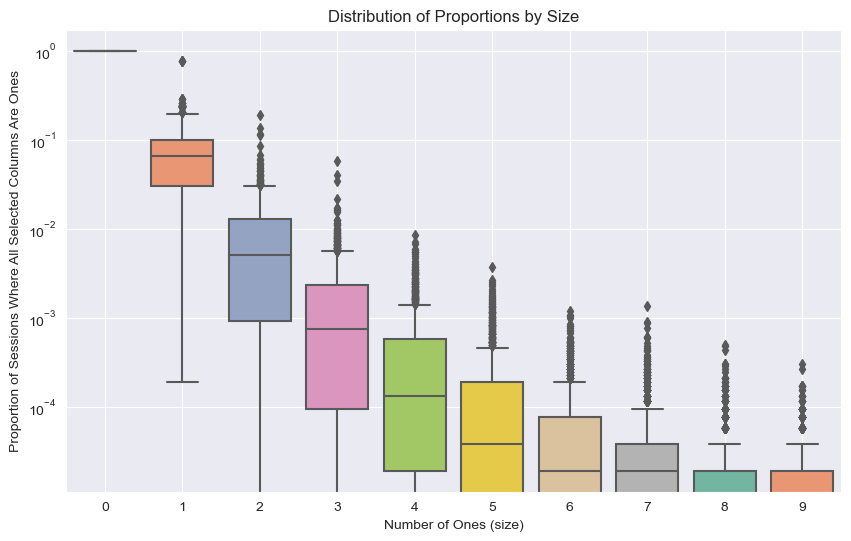